# This is where I built and tested the linear regression model for the website

The model was built using the following steps:

1. Load the data
2. Preprocess the data
3. Train the model
4. Evaluate the model
5. Rebuild the model with the best hyperparameters
6. Make predictions


In [42]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import collections
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
# read in the cleaned data
data = pd.read_csv("./data/match_data_cleaned.csv")
pd.set_option("display.max_columns", None)
data.head()

,Match ID,Assists,Assists Turnover Ratio,Bench Points,Biggest Lead,Biggest Scoring Run,Blocks,Blocks Received,Defensive Points Per Possession,Defensive Rating,Efficiency,Fast Break Points Attempted,Fast Break Points Made,Fast Break Points Percentage,Field Goals Attempted,Field Goals Effective Adjusted,Field Goals Made,Field Goals Percentage,Fouled Out,Fouls Bench Technical,Fouls Coach Technical,Fouls Disqualifying,Fouls Offensive,Fouls On,Fouls Personal,Fouls Team,Fouls Technical,Fouls Total,Free Throws Attempted,Free Throws Made,Free Throws Percentage,Lead Changes,Minutes,Offensive Points Per Possession,Offensive Rating,Pace,Points,Points Against,Points Fast Break,Points From Turnovers,Points In Paint,Points In Paint Attempted,Points In Paint Made,Points In Paint Percentage,Points Second Chance,Possessions,Possessions Opponent,Rebounds Defensive,Rebounds Defensive Deadball,Rebounds Offensive,Rebounds Offensive Deadball,Rebounds Personal,Rebounds Team,Rebounds Team Defensive,Rebounds Team Offensive,Rebounds Total,Second Chance Points Attempted,Second Chance Points Made,Second Chance Points Percentage,Steals,Three Pointers Attempted,Three Pointers Made,Three Pointers Percentage,Time Leading,Times Scores Level,Transition Defence,Transition Offence,Turnovers,Turnovers Team,Two Pointers Attempted,Two Pointers Made,Two Pointers Percentage,Team ID,Team Name,Win
0,1007557,20,1.538462,8,23,0,3,0,0.00,0.00,102,0,0,0.00,50,0.740000,29,0.580000,0,0,0,0,0,0,15,0,0,15,26,20,0.769231,1,200.0,0.00,0.00,0,96,83,7,11,24,0,0,0.0,6,0.00,0.00,28,0,7,3,33,2,1,1,35,0,0,0.00,3,24,16,0.666667,0.00,0,0.00,2.333333,13,1,26,13,0.50,103674,Hampton,1
1,1007557,15,2.500000,27,1,0,0,3,0.00,0.00,61,0,0,0.00,59,0.618644,29,0.491525,1,0,0,0,0,0,20,0,0,20,16,10,0.625000,1,200.0,0.00,0.00,0,83,96,0,21,22,0,0,0.0,6,0.00,0.00,17,0,6,2,22,1,0,1,23,0,0,0.00,5,34,15,0.441176,0.00,1,0.00,0.000000,6,0,25,14,0.56,103826,Longwood,0
2,1007560,29,2.640000,34,84,22,8,1,0.55,54.74,203,32,27,0.84,74,0.670000,44,0.590000,0,0,0,0,2,30,15,0,0,15,48,33,0.690000,0,0.0,1.51,150.55,0,132,48,43,39,56,28,28,1.0,23,87.68,87.68,43,0,18,5,60,1,0,1,61,22,13,0.59,15,22,11,0.500000,39.82,0,0.86,2.870000,11,0,52,33,0.63,103549,Duke,1
3,1007560,10,0.420000,26,0,4,1,8,1.51,150.55,-4,3,3,1.00,74,0.300000,19,0.260000,0,0,0,0,1,15,30,0,0,30,8,4,0.500000,0,0.0,0.55,54.74,0,48,132,6,3,20,10,10,1.0,11,87.68,87.68,21,1,15,1,30,6,3,3,36,12,4,0.33,7,29,6,0.210000,0.00,0,2.87,0.860000,24,1,45,13,0.29,103602,Ferris St.,0
4,1007570,10,0.910000,36,5,0,1,1,0.00,0.00,61,0,0,0.00,59,0.540000,29,0.490000,0,0,0,0,0,0,21,0,0,21,22,13,0.590000,5,200.0,0.00,0.00,0,77,74,0,8,0,0,0,0.0,12,67.22,0.00,25,0,13,4,34,4,3,1,38,0,0,0.00,7,16,6,0.380000,0.00,2,0.00,0.000000,11,1,43,23,0.53,103364,Boston U.,1


In [35]:
# Build the model
features = [
    "Assists",
    "Assists Turnover Ratio",
    "Bench Points",
    "Biggest Lead",
    "Blocks",
    "Blocks Received",
    "Defensive Points Per Possession",
    "Fast Break Points Percentage",
    "Field Goals Percentage",
    "Fouls Total",
    "Free Throws Percentage",
    "Lead Changes",
    "Offensive Points Per Possession",
    "Points In Paint Percentage",
    "Points Second Chance",
    "Rebounds Defensive",
    "Rebounds Offensive",
    "Rebounds Total",
    "Second Chance Points Percentage",
    "Steals",
    "Three Pointers Percentage",
    "Turnovers",
    "Two Pointers Percentage",
]
target = "Win"
data[features] = data[features].fillna(data[features].mean())
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
)

# Initialize the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Since we're using Linear Regression inappropriately for classification, we can round predictions
# to retrieve binary outcomes: 0 for lose, 1 for win
y_pred_binary = np.round(y_pred)

# Calculate the accuracy manually (since we're using regression for classification)
accuracy = np.mean(y_pred_binary == y_test)
print(f"Accuracy: {accuracy}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_binary)
print(f"Mean Squared Error: {mse}")

Accuracy: 0.8831395348837209
Mean Squared Error: 0.1171980495123781


In [36]:
# OLS Regression
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     9155.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        19:48:28   Log-Likelihood:                -59542.
No. Observations:              177732   AIC:                         1.191e+05
Df Residuals:                  177708   BIC:                         1.194e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

We can see from the OLS regression that the Points In Paint Percentage, Rebounds Total, Rebounds Offensive, and Rebounds Defensive have the highest p-values meaning that they are not statistically significant. We can remove these features from the model and re-run the regression.


In [38]:
# Rebuild the model
features = [
    "Assists",
    "Assists Turnover Ratio",
    "Bench Points",
    "Biggest Lead",
    "Blocks",
    "Blocks Received",
    "Defensive Points Per Possession",
    "Fast Break Points Percentage",
    "Field Goals Percentage",
    "Fouls Total",
    "Free Throws Percentage",
    "Lead Changes",
    "Offensive Points Per Possession",
    "Points Second Chance",
    "Second Chance Points Percentage",
    "Steals",
    "Three Pointers Percentage",
    "Turnovers",
    "Two Pointers Percentage",
]
target = "Win"
data[features] = data[features].fillna(data[features].mean())
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
)

# Initialize the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Since we're using Linear Regression inappropriately for classification, we can round predictions
# to retrieve binary outcomes: 0 for lose, 1 for win
y_pred_binary = np.round(y_pred)

# Calculate the accuracy manually (since we're using regression for classification)
accuracy = np.mean(y_pred_binary == y_test)
print(f"Accuracy: {accuracy}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_binary)
print(f"Mean Squared Error: {mse}")

Accuracy: 0.8736496624156039
Mean Squared Error: 0.12702550637659416


In [39]:
# OLS Regression
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        19:48:46   Log-Likelihood:                -63856.
No. Observations:              177732   AIC:                         1.278e+05
Df Residuals:                  177712   BIC:                         1.280e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Looking at the OLS regression model again we can see that the Assists has the highest p-value meaning that it is not statistically significant. We can remove this feature from the model and re-run the regression again.


In [40]:
# Rebuild the model again
features = [
    "Assists Turnover Ratio",
    "Bench Points",
    "Biggest Lead",
    "Blocks",
    "Blocks Received",
    "Defensive Points Per Possession",
    "Fast Break Points Percentage",
    "Field Goals Percentage",
    "Fouls Total",
    "Free Throws Percentage",
    "Lead Changes",
    "Offensive Points Per Possession",
    "Points Second Chance",
    "Second Chance Points Percentage",
    "Steals",
    "Three Pointers Percentage",
    "Turnovers",
    "Two Pointers Percentage",
]
target = "Win"
data[features] = data[features].fillna(data[features].mean())
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
)

# Initialize the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Since we're using Linear Regression inappropriately for classification, we can round predictions
# to retrieve binary outcomes: 0 for lose, 1 for win
y_pred_binary = np.round(y_pred)

# Calculate the accuracy manually (since we're using regression for classification)
accuracy = np.mean(y_pred_binary == y_test)
print(f"Accuracy: {accuracy}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_binary)
print(f"Mean Squared Error: {mse}")

Accuracy: 0.8735183795948988
Mean Squared Error: 0.12687546886721682


In [41]:
# OLS Regression
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        19:49:01   Log-Likelihood:                -63856.
No. Observations:              177732   AIC:                         1.278e+05
Df Residuals:                  177713   BIC:                         1.279e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Now we can see that every feature has a p-value less than 0.05 meaning that they are all statistically significant.


In [27]:
# map the team name to the team ID
team_mapping = dict(zip(data["Team ID"], data["Team Name"]))

team_avg = data.groupby("Team ID")[features].mean()

team_avg["Team Name"] = team_avg.index.map(team_mapping)

## Run the code below to see how one team performs against another team


In [28]:
# Predicting the outcome of a match
try:
    team_name1 = input("Enter a team name: ")
    input_row1 = team_avg[team_avg["Team Name"] == team_name1]
    prediction1 = model.predict(input_row1[features])
    team_name2 = input("Enter another team name: ")
    input_row2 = team_avg[team_avg["Team Name"] == team_name2]
    prediction2 = model.predict(input_row2[features])
    print(
        f"The winrate of {team_name1} {prediction1[0]}. The win rate of {team_name2} {prediction2[0]}"
    )
    total = prediction1[0] + prediction2[0]
    if prediction1[0] > prediction2[0]:
        print(
            f"{team_name1} is more likely to win. With a win percentage of {prediction1[0]/total}"
        )
    else:
        print(
            f"{team_name2} is more likely to win. With a win percentage of {prediction2[0]/total}"
        )
except Exception as e:
    print("Team not found")
    print(e)

The winrate of Duke 0.8045599872141073. The win rate of Purdue 0.7116348526883041
Duke is more likely to win. With a win percentage of 0.5306441929758132


## Run the code below to see the chances of a team making it through the playoffs and winning the championship


In [33]:
# Calculate the probability of a team making it to the next round
try:
    team_name = input("Enter a team name: ")
    input_row = team_avg[team_avg["Team Name"] == team_name]
    prediction = model.predict(input_row[features])
    prediction = prediction[0] / (prediction[0] + 0.5)
    print(
        f"""Probability of {team_name} winning Round of 64 is {prediction}
Probability of {team_name} winning Round of 32 is {pow(prediction, 2)}
Probability of {team_name} winning Sweet 16 is {pow(prediction, 3)}
Probability of {team_name} winning Elite 8 is {pow(prediction, 4)}
Probability of {team_name} winning Final 4 is {pow(prediction, 5)}
Probability of {team_name} winning Championship is {pow(prediction, 6)}""",
    )
except Exception as e:
    print("Team not found")
    print(e)

Probability of Duke winning Round of 64 is 0.6167290083242919
Probability of Duke winning Round of 32 is 0.3803546697086645
Probability of Duke winning Sweet 16 is 0.23457575826093824
Probability of Duke winning Elite 8 is 0.14466967476918727
Probability of Duke winning Final 4 is 0.08922198505499869
Probability of Duke winning Championship is 0.05502578636369414


## Run the code below to see the chances of a team making it through the playoffs and winning the championship with custom teams in the braket

Note that this feature was improved in the app with the round of 16 if you want to see the best version of this feature go to the app


In [203]:
# Ask the user for the seeding of the teams Final 4
try:
    team_matches = collections.defaultdict(str)
    team_predictions = collections.defaultdict(float)

    team_name1 = input("Enter a team name (seed 1): ")
    input_row1 = team_avg[team_avg["Team Name"] == team_name1]
    prediction1 = model.predict(input_row1[features])
    team_predictions[team_name1] = prediction1[0]

    team_name2 = input("Enter another team name (seed 2): ")
    input_row2 = team_avg[team_avg["Team Name"] == team_name2]
    prediction2 = model.predict(input_row2[features])
    team_predictions[team_name2] = prediction2[0]

    team_name3 = input("Enter another team name (seed 3): ")
    input_row3 = team_avg[team_avg["Team Name"] == team_name3]
    prediction3 = model.predict(input_row3[features])
    team_predictions[team_name3] = prediction3[0]

    team_name4 = input("Enter another team name (seed 4): ")
    input_row4 = team_avg[team_avg["Team Name"] == team_name4]
    prediction4 = model.predict(input_row4[features])
    team_predictions[team_name4] = prediction4[0]

    print(
        f"""Probability of {team_name1} (seed 1) winning against {team_name4} (seed 4) {prediction1[0]/(prediction1[0]+prediction4[0])}"""
    )
    team_name14 = input(
        f"Enter in the winner of the previous match: {team_name1} (seed 1) vs {team_name4} (seed 4)"
    )

    team_predictions[team_name14] = (
        prediction4 if team_name14 == team_name1 else prediction1
    )
    input_row14 = team_avg[team_avg["Team Name"] == team_name14]
    prediction14 = model.predict(input_row14[features])

    print(
        f"""Probability of {team_name2} (seed 2) winning against {team_name3} (seed 3) {prediction2[0]/(prediction2[0]+prediction3[0])}"""
    )
    team_name23 = input(
        f"Enter in the winner of the previous match: {team_name2} (seed 2) vs {team_name3} (seed 3)"
    )
    input_row23 = team_avg[team_avg["Team Name"] == team_name23]
    prediction23 = model.predict(input_row23[features])
    team_predictions[team_name23] = (
        prediction3 if team_name23 == team_name2 else prediction2
    )
    print(
        f"""Probability of {team_name14} winning against {team_name23} {prediction14[0]/(prediction14[0]+prediction23[0])}"""
    )
    team_name_final = input(
        f"Enter in the winner of the previous match: {team_name14} vs {team_name23}"
    )
    input_row_final = team_avg[team_avg["Team Name"] == team_name_final]
    prediction_final = model.predict(input_row_final[features])

    print(
        f"""The probability of {team_name_final} winning the championship is {(prediction_final[0]/(prediction14[0]+prediction23[0]) * prediction_final[0]/(prediction_final[0] + team_predictions[team_name_final]))[0]}"""
    )


except Exception as e:
    print("Team not found")
    print(e)

Probability of Virginia Tech (seed 1) winning against Purdue (seed 4) 0.4742625171101881
Probability of Duke (seed 2) winning against UConn (seed 3) 0.5294230319121791
Probability of Virginia Tech winning against Duke 0.44688880144058973
The probability of Virginia Tech winning the championship is 0.21194260783956914


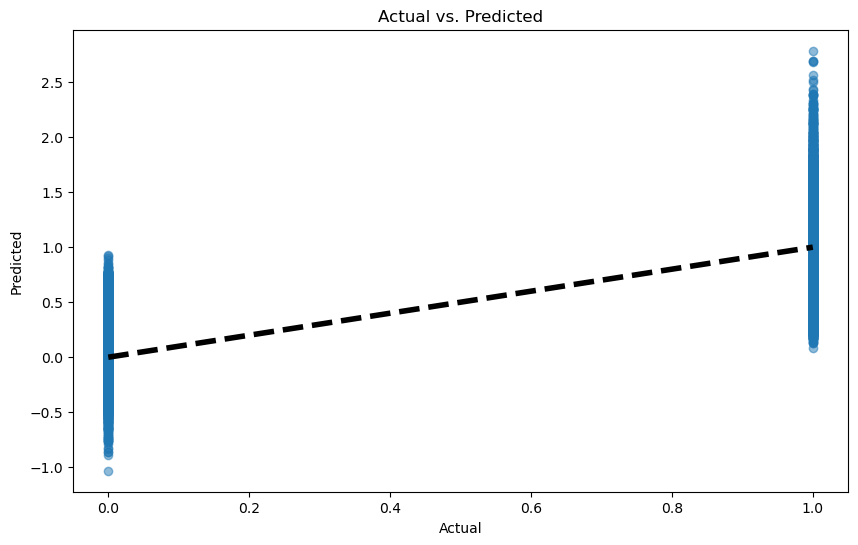

In [48]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()